# First ML Project in Python
**link:** https://machinelearningmastery.com/machine-learning-in-python-step-by-step/

## Setup

In [5]:
# Check the versions of libraries

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.7 (default, Apr 24 2020, 01:43:00) 
[Clang 11.0.3 (clang-1103.0.32.29)]
scipy: 1.4.1
numpy: 1.18.4
matplotlib: 2.2.3
pandas: 1.0.3
sklearn: 0.22.2.post1


## Loading Data

In [2]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names=names)

## Summarizing Data

In [4]:
# shape
print(dataset.shape)  # prints (rows, columns) aka (instances, attributes)

(150, 5)


In [5]:
# head
print(dataset.head(20))

    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [6]:
# descriptions
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [7]:
# class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


## Data Visualization

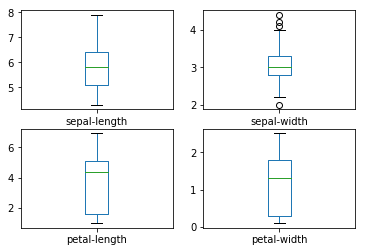

In [8]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2, 2), sharex=False, sharey=False)
pyplot.show()

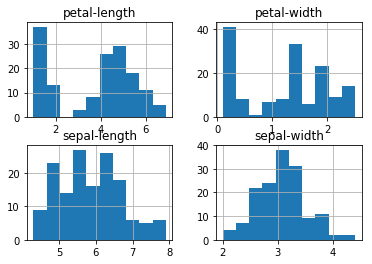

In [9]:
# histograms
dataset.hist()
pyplot.show()

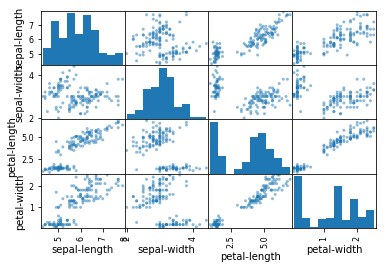

In [10]:
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

The diagonal grouping of some pairs of attributes suggests a high correlation and a predictable relationship.

## Evaluating Algorithms

In [11]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [12]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.941667 (0.053359)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


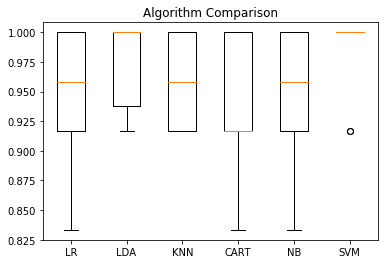

In [13]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

There is a population of accuracy measures for each algorithm because each algorithm was evaluated 10 times

We can see that the box and whisker plots are squashed at the top of the range, with many evaluations achieving 100% accuracy, and some pushing down into the high 80% accuracies.

## Making Predictions

In [14]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [15]:
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



# Speech Recognition With Python
**link:** https://realpython.com/python-speech-recognition/

## Setup

In [9]:
import speech_recognition as sr
sr.__version__

'3.8.1'

In [13]:
r = sr.Recognizer()

## Working with Audio Files

### Capturing Data

In [12]:
harvard = sr.AudioFile('harvard.wav')
with harvard as source:
   audio = r.record(source)
type(audio)

speech_recognition.AudioData

In [14]:
r.recognize_google(audio)

'the stale smell of old beer lingers it takes heat to bring out the odor a cold dip restores health and zest a salt pickle taste fine with ham tacos al Pastore are my favorite a zestful food is be hot cross bun'

### Capturing Segments

In [15]:
with harvard as source:
    audio = r.record(source, duration=4)

r.recognize_google(audio)

'the stale smell of old beer lingers'

In [17]:
with harvard as source:
    audio1 = r.record(source, duration=4)
    audio2 = r.record(source, duration=4)

r.recognize_google(audio1)

r.recognize_google(audio2)

'it takes heat to bring out the odor a cold dip'

In [18]:
with harvard as source:
    audio = r.record(source, offset=4, duration=3)

r.recognize_google(audio)

'it takes heat to bring out the odor'

In [19]:
with harvard as source:
    audio = r.record(source, offset=4.7, duration=2.8)

r.recognize_google(audio)

'takes heat to bring out the odor Aiko'

## Dealing with Noise

In [20]:
jackhammer = sr.AudioFile('jackhammer.wav')
with jackhammer as source:
    audio = r.record(source)

r.recognize_google(audio)

'the snail smelly old gear vendors'

In [21]:
with jackhammer as source:
    r.adjust_for_ambient_noise(source)
    audio = r.record(source)

r.recognize_google(audio)

'Bill smell like old beer drinkers'

In [22]:
with jackhammer as source:
    r.adjust_for_ambient_noise(source, duration=0.5)
    audio = r.record(source)

r.recognize_google(audio)

'the stale smell of old gear vendors'

In [23]:
r.recognize_google(audio, show_all=True)

{'alternative': [{'transcript': 'the stale smell of old gear vendors'},
  {'transcript': 'does still smell old gear vendors'},
  {'transcript': 'the smell smell of old gear vendors'},
  {'transcript': 'the snail smell of old gear vendors'},
  {'transcript': 'the still smell of old gear vendors'},
  {'transcript': 'the snail smelly old gear vendors'},
  {'transcript': 'the still smell old gear vendors'},
  {'transcript': 'does still sell old gear vendors'},
  {'transcript': 'does still smell old giro vendors'}],
 'final': True}

## Working with Microphones

### The Microphone Class

In [26]:
import speech_recognition as sr
r = sr.Recognizer()

In [28]:
import sys  
!{sys.executable} -m pip install --user pyaudio

Processing /Users/shreyas/Library/Caches/pip/wheels/40/2e/4c/b71e7e96c861a46e6213bc6bb482b94dcf293a92c5e736c1ec/PyAudio-0.2.11-cp37-cp37m-macosx_10_15_x86_64.whl


In [30]:
mic = sr.Microphone()
sr.Microphone.list_microphone_names()
# mic = sr.Microphone(device_index=3)

['Built-in Microphone',
 'Built-in Output',
 'Soundflower (2ch)',
 'Soundflower (64ch)']

### Capturing Microphone Input

In [31]:
with mic as source:
    r.adjust_for_ambient_noise(source)
    audio = r.listen(source)
# speak into mic once this starts running, then wait for it to process

In [32]:
r.recognize_google(audio)

'hello'

### Unrecognizable Speech

In [35]:
with mic as source:
    r.adjust_for_ambient_noise(source)
    audio = r.listen(source)
# speak into mic once this starts running, then wait for it to process

In [36]:
r.recognize_google(audio)

UnknownValueError: 

## Guess the Word Game

### Script

In [40]:
import random
import time

import speech_recognition as sr


def recognize_speech_from_mic(recognizer, microphone):
    """Transcribe speech from recorded from `microphone`.

    Returns a dictionary with three keys:
    "success": a boolean indicating whether or not the API request was
               successful
    "error":   `None` if no error occured, otherwise a string containing
               an error message if the API could not be reached or
               speech was unrecognizable
    "transcription": `None` if speech could not be transcribed,
               otherwise a string containing the transcribed text
    """
    # check that recognizer and microphone arguments are appropriate type
    if not isinstance(recognizer, sr.Recognizer):
        raise TypeError("`recognizer` must be `Recognizer` instance")

    if not isinstance(microphone, sr.Microphone):
        raise TypeError("`microphone` must be `Microphone` instance")

    # adjust the recognizer sensitivity to ambient noise and record audio
    # from the microphone
    with microphone as source:
        recognizer.adjust_for_ambient_noise(source)
        audio = recognizer.listen(source)

    # set up the response object
    response = {
        "success": True,
        "error": None,
        "transcription": None
    }

    # try recognizing the speech in the recording
    # if a RequestError or UnknownValueError exception is caught,
    #     update the response object accordingly
    try:
        response["transcription"] = recognizer.recognize_google(audio)
    except sr.RequestError:
        # API was unreachable or unresponsive
        response["success"] = False
        response["error"] = "API unavailable"
    except sr.UnknownValueError:
        # speech was unintelligible
        response["error"] = "Unable to recognize speech"

    return response


if __name__ == "__main__":
    # set the list of words, maxnumber of guesses, and prompt limit
    WORDS = ["apple", "banana", "grape", "orange", "mango", "lemon"]
    NUM_GUESSES = 3
    PROMPT_LIMIT = 5

    # create recognizer and mic instances
    recognizer = sr.Recognizer()
    microphone = sr.Microphone()

    # get a random word from the list
    word = random.choice(WORDS)

    # format the instructions string
    instructions = (
        "I'm thinking of one of these words:\n"
        "{words}\n"
        "You have {n} tries to guess which one.\n"
    ).format(words=', '.join(WORDS), n=NUM_GUESSES)

    # show instructions and wait 3 seconds before starting the game
    print(instructions)
    time.sleep(3)

    for i in range(NUM_GUESSES):
        # get the guess from the user
        # if a transcription is returned, break out of the loop and
        #     continue
        # if no transcription returned and API request failed, break
        #     loop and continue
        # if API request succeeded but no transcription was returned,
        #     re-prompt the user to say their guess again. Do this up
        #     to PROMPT_LIMIT times
        for j in range(PROMPT_LIMIT):
            print('Guess {}. Speak!'.format(i+1))
            guess = recognize_speech_from_mic(recognizer, microphone)
            if guess["transcription"]:
                break
            if not guess["success"]:
                break
            print("I didn't catch that. What did you say?\n")

        # if there was an error, stop the game
        if guess["error"]:
            print("ERROR: {}".format(guess["error"]))
            break

        # show the user the transcription
        print("You said: {}".format(guess["transcription"]))

        # determine if guess is correct and if any attempts remain
        guess_is_correct = guess["transcription"].lower() == word.lower()
        user_has_more_attempts = i < NUM_GUESSES - 1

        # determine if the user has won the game
        # if not, repeat the loop if user has more attempts
        # if no attempts left, the user loses the game
        if guess_is_correct:
            print("Correct! You win!".format(word))
            break
        elif user_has_more_attempts:
            print("Incorrect. Try again.\n")
        else:
            print("Sorry, you lose!\nI was thinking of '{}'.".format(word))
            break

I'm thinking of one of these words:
apple, banana, grape, orange, mango, lemon
You have 3 tries to guess which one.

Guess 1. Speak!
I didn't catch that. What did you say?

Guess 1. Speak!
You said: mango
Incorrect. Try again.

Guess 2. Speak!
You said: Orange
Correct! You win!


# Federated Learning for Image Classification
**link:** https://www.tensorflow.org/federated/tutorials/federated_learning_for_image_classification

## Setup

In [7]:
import sys  
!{sys.executable} -m pip install --quiet --user nest_asyncio tensorflow_federated_nightly tensorboard

In [8]:
import nest_asyncio
nest_asyncio.apply()

In [9]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [10]:
import collections

import numpy as np
import tensorflow as tf
import tensorflow_federated as tff

np.random.seed(0)

tff.federated_computation(lambda: 'Hello, World!')()

b'Hello, World!'

## Preparing Data

In [11]:
emnist_train, emnist_test = tff.simulation.datasets.emnist.load_data()

97402880/97398400 [==============================] - 10s 0us/step


In [15]:
len(emnist_train.client_ids)

3383

In [14]:
emnist_train.element_type_structure

OrderedDict([('label', TensorSpec(shape=(), dtype=tf.int32, name=None)),
             ('pixels',
              TensorSpec(shape=(28, 28), dtype=tf.float32, name=None))])

In [16]:
example_dataset = emnist_train.create_tf_dataset_for_client(
    emnist_train.client_ids[0])

example_element = next(iter(example_dataset))

example_element['label'].numpy()

5

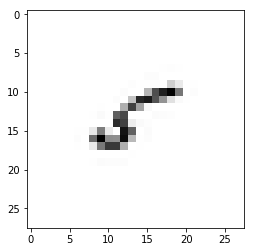

In [18]:
from matplotlib import pyplot as plt
plt.imshow(example_element['pixels'].numpy(), cmap='gray', aspect='equal')
plt.grid(False)
_ = plt.show()

## Exploring Data

/usr/local/lib/python3.7/site-packages/cycler.py:374: RuntimeWarning: coroutine 'wrap_coroutine_in_current_trace_context.<locals>._wrapped' was never awaited
  for k in keys:
/usr/local/lib/python3.7/site-packages/cycler.py:374: RuntimeWarning: coroutine '_invoke' was never awaited
  for k in keys:


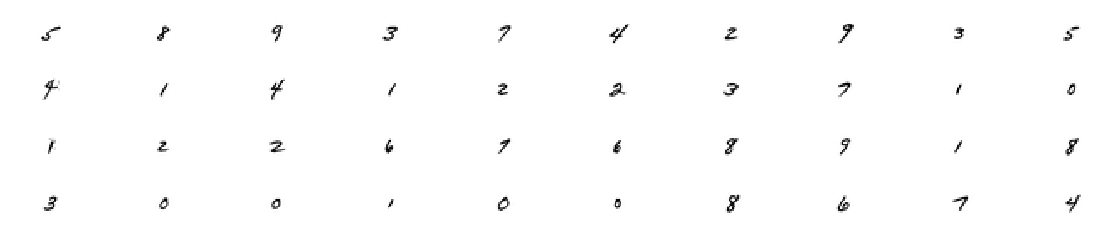

In [19]:
## Example MNIST digits for one client
figure = plt.figure(figsize=(20, 4))
j = 0

for example in example_dataset.take(40):
  plt.subplot(4, 10, j+1)
  plt.imshow(example['pixels'].numpy(), cmap='gray', aspect='equal')
  plt.axis('off')
  j += 1

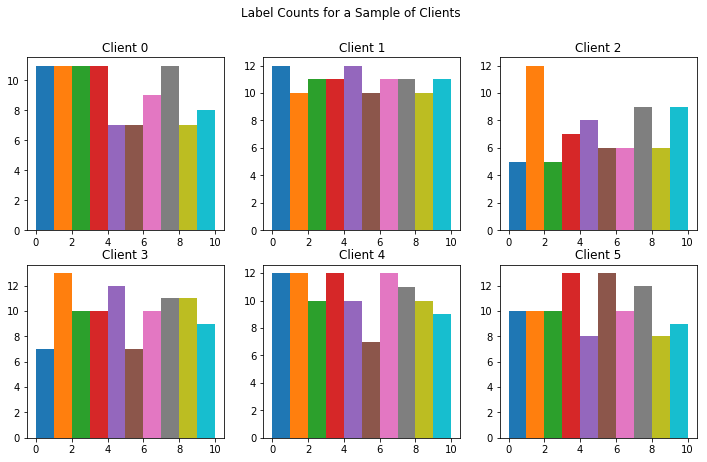

In [20]:
# Number of examples per layer for a sample of clients
f = plt.figure(figsize=(12, 7))
f.suptitle('Label Counts for a Sample of Clients')
for i in range(6):
  client_dataset = emnist_train.create_tf_dataset_for_client(
      emnist_train.client_ids[i])
  plot_data = collections.defaultdict(list)
  for example in client_dataset:
    # Append counts individually per label to make plots
    # more colorful instead of one color per plot.
    label = example['label'].numpy()
    plot_data[label].append(label)
  plt.subplot(2, 3, i+1)
  plt.title('Client {}'.format(i))
  for j in range(10):
    plt.hist(
        plot_data[j],
        density=False,
        bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

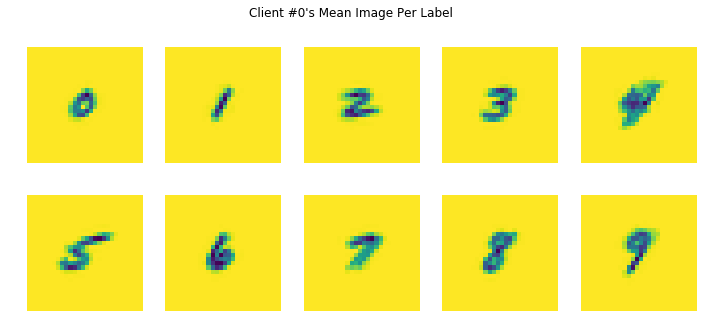

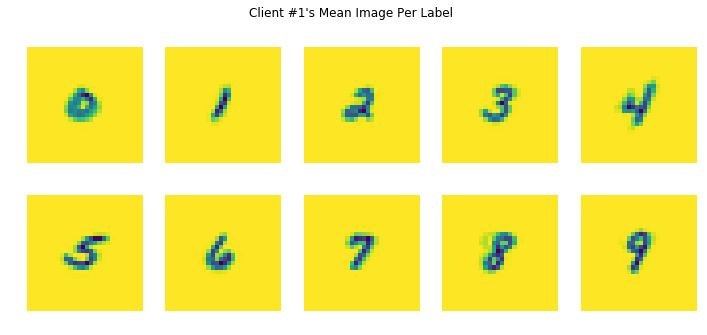

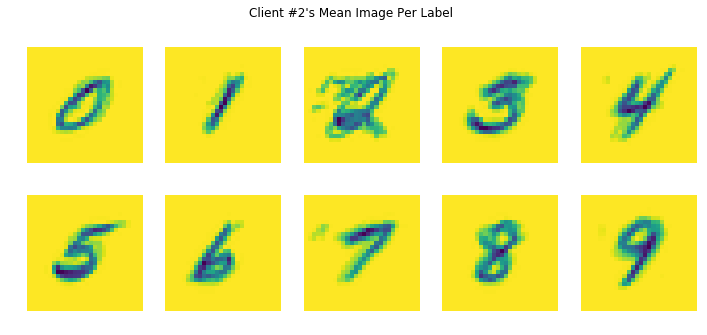

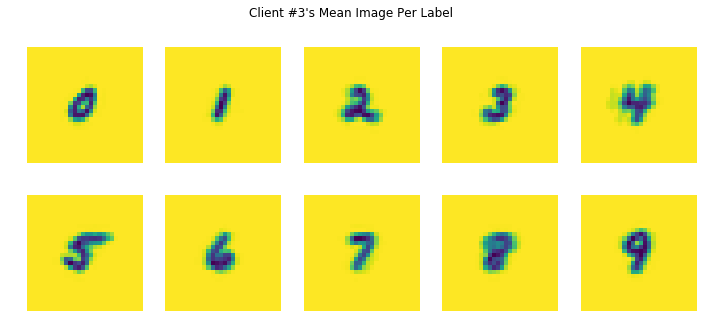

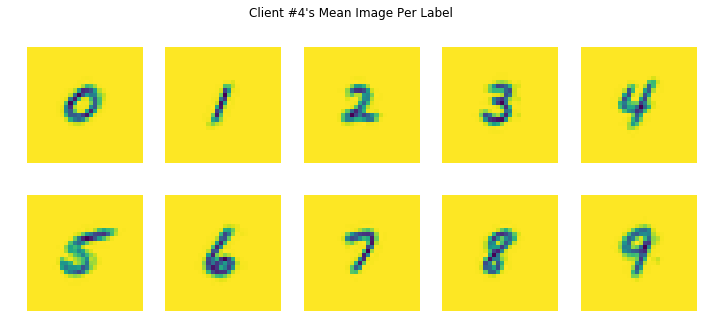

In [21]:
# Each client has different mean images, meaning each client will be nudging
# the model in their own directions locally.

for i in range(5):
  client_dataset = emnist_train.create_tf_dataset_for_client(
      emnist_train.client_ids[i])
  plot_data = collections.defaultdict(list)
  for example in client_dataset:
    plot_data[example['label'].numpy()].append(example['pixels'].numpy())
  f = plt.figure(i, figsize=(12, 5))
  f.suptitle("Client #{}'s Mean Image Per Label".format(i))
  for j in range(10):
    mean_img = np.mean(plot_data[j], 0)
    plt.subplot(2, 5, j+1)
    plt.imshow(mean_img.reshape((28, 28)))
    plt.axis('off')

## Preprocessing Input Data

In [22]:
NUM_CLIENTS = 10
NUM_EPOCHS = 5
BATCH_SIZE = 20
SHUFFLE_BUFFER = 100
PREFETCH_BUFFER= 10

def preprocess(dataset):

  def batch_format_fn(element):
    """Flatten a batch `pixels` and return the features as an `OrderedDict`."""
    return collections.OrderedDict(
        x=tf.reshape(element['pixels'], [-1, 784]),
        y=tf.reshape(element['label'], [-1, 1]))

  return dataset.repeat(NUM_EPOCHS).shuffle(SHUFFLE_BUFFER).batch(
      BATCH_SIZE).map(batch_format_fn).prefetch(PREFETCH_BUFFER)

In [23]:
preprocessed_example_dataset = preprocess(example_dataset)

sample_batch = tf.nest.map_structure(lambda x: x.numpy(),
                                     next(iter(preprocessed_example_dataset)))

sample_batch

OrderedDict([('x', array([[1., 1., 1., ..., 1., 1., 1.],
                     [1., 1., 1., ..., 1., 1., 1.],
                     [1., 1., 1., ..., 1., 1., 1.],
                     ...,
                     [1., 1., 1., ..., 1., 1., 1.],
                     [1., 1., 1., ..., 1., 1., 1.],
                     [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)),
             ('y', array([[7],
                     [3],
                     [7],
                     [3],
                     [6],
                     [2],
                     [8],
                     [1],
                     [6],
                     [4],
                     [9],
                     [7],
                     [7],
                     [0],
                     [1],
                     [2],
                     [3],
                     [5],
                     [4],
                     [2]], dtype=int32))])

In [24]:
# construct a list of datasets from the given set of users as an input to a round of training or evaluation
def make_federated_data(client_data, client_ids):
  return [
      preprocess(client_data.create_tf_dataset_for_client(x))
      for x in client_ids
  ]

In [25]:
sample_clients = emnist_train.client_ids[0:NUM_CLIENTS]

federated_train_data = make_federated_data(emnist_train, sample_clients)

print('Number of client datasets: {l}'.format(l=len(federated_train_data)))
print('First dataset: {d}'.format(d=federated_train_data[0]))

Number of client datasets: 10
First dataset: <PrefetchDataset shapes: OrderedDict([(x, (None, 784)), (y, (None, 1))]), types: OrderedDict([(x, tf.float32), (y, tf.int32)])>


## Using Keras

In [26]:
# Simple model
def create_keras_model():
  return tf.keras.models.Sequential([
      tf.keras.layers.Input(shape=(784,)),
      tf.keras.layers.Dense(10, kernel_initializer='zeros'),
      tf.keras.layers.Softmax(),
  ])

In [27]:
def model_fn():
  # We _must_ create a new model here, and _not_ capture it from an external
  # scope. TFF will call this within different graph contexts.
  keras_model = create_keras_model()
  return tff.learning.from_keras_model(
      keras_model,
      input_spec=preprocessed_example_dataset.element_spec,
      loss=tf.keras.losses.SparseCategoricalCrossentropy(),
      metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

## Training Model on Federated Data

In [28]:
iterative_process = tff.learning.build_federated_averaging_process(
    model_fn,
    client_optimizer_fn=lambda: tf.keras.optimizers.SGD(learning_rate=0.02),
    server_optimizer_fn=lambda: tf.keras.optimizers.SGD(learning_rate=1.0))

In [29]:
str(iterative_process.initialize.type_signature)

'( -> <model=<trainable=<float32[784,10],float32[10]>,non_trainable=<>>,optimizer_state=<int64>,delta_aggregate_state=<>,model_broadcast_state=<>>@SERVER)'

In [30]:
state = iterative_process.initialize()

In [31]:
state, metrics = iterative_process.next(state, federated_train_data)
print('round  1, metrics={}'.format(metrics))

round  1, metrics=OrderedDict([('broadcast', ()), ('aggregation', ()), ('train', OrderedDict([('sparse_categorical_accuracy', 0.11666667), ('loss', 3.0560782)]))])


In [32]:
NUM_ROUNDS = 11
for round_num in range(2, NUM_ROUNDS):
  state, metrics = iterative_process.next(state, federated_train_data)
  print('round {:2d}, metrics={}'.format(round_num, metrics))

round  2, metrics=OrderedDict([('broadcast', ()), ('aggregation', ()), ('train', OrderedDict([('sparse_categorical_accuracy', 0.1388889), ('loss', 2.9345596)]))])
round  3, metrics=OrderedDict([('broadcast', ()), ('aggregation', ()), ('train', OrderedDict([('sparse_categorical_accuracy', 0.16707818), ('loss', 2.7898586)]))])
round  4, metrics=OrderedDict([('broadcast', ()), ('aggregation', ()), ('train', OrderedDict([('sparse_categorical_accuracy', 0.16666667), ('loss', 2.6164174)]))])
round  5, metrics=OrderedDict([('broadcast', ()), ('aggregation', ()), ('train', OrderedDict([('sparse_categorical_accuracy', 0.20205761), ('loss', 2.633059)]))])
round  6, metrics=OrderedDict([('broadcast', ()), ('aggregation', ()), ('train', OrderedDict([('sparse_categorical_accuracy', 0.2164609), ('loss', 2.4687788)]))])
round  7, metrics=OrderedDict([('broadcast', ()), ('aggregation', ()), ('train', OrderedDict([('sparse_categorical_accuracy', 0.23312758), ('loss', 2.466979)]))])
round  8, metrics=Or